# Intro

This is my first attempt at a jupyter notebook for the task provided by Tony J and Anna. Below is an extract from the readme that was provided: 

#### Readme extract
_The Data Shed, in conjunction with the University of Leeds, undertook a series of quantitative survery of C-suite executives in 2020, 2021 & 2022 with a view to exploring and understanding the role data played in, the relative maturity of and potential influencing factors of, the organisations surveyed._

_Of the 3 waves, question sets were broadly aligned with some refinement/addition in 2022._

_The response data and questions (cleansed) are provided as multiple sheets of a single .xlsx in the 'data' folder of this repo._

_Wave 1 (2020) was conducted just prior to the Covid outbreak in February, so Covid-related questions are not included there._

_Participant volumes were approx. 100, 100, 200 across the waves with only some participation from the same responder in multiple waves._

_Response data is broken up into 3 sections:_
- _General Socio-Demographic, Industry, Company Financials, Job Role etc_
- _Qualifying (QS)_
- _Survey (Q)_

_Some survey questions have multiple sub-responses or follow-on sub-questions relating to specific details (generic example: Qx[a-b]rN), some are free-text in nature and a couple slightly altered their response categories in the final wave._

_Survey question responses can be mapped to both numeric (mainly ordinal, but there are exceptions) and categoric labels.
Some pointers to questions are provided below, but not in every instance, so understanding the make up of data & questions is vital._


Therefore, we'll be using the data to try and assess: Does the business use their data in an efficent way, and are there any behaviours that companies that use their data that we could recommend to other customers? 

To this end, I'll answer the questions provided by Tony, then look to draw conclusions from this. After that, the main takeaways can be decided upon, and the visualisations to provide to customers created. 

First thing to do will be to import the libraries. This'll be a work i progress, so will likely expand as time goes by...   


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as ss
from scipy.stats import pearsonr, chi2_contingency
from seaborn import regplot
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
from pingouin import ttest


Next up let's get the csv of the data I'll need. Shamelessly nicked the code for this from Tony J's attempt, but honestly how many ways are there to change an excel document to a dataframe? Having said that I'm now imagining there's about twenty... 

In [2]:
xls = pd.ExcelFile('C:\\Users\\Shedder\\analytics-guild\\data\\amf_research_cleansed_data.xlsx')
flatresponse_df = pd.read_excel(xls, 'flatresponses')


In [3]:
flatresponse_df.head()


,record,S1,S2,HIDAge,HIDAge2,S3,S4,HIDSEG,QS3,QS4,...,Q10br6,Q10br7,Q10br8,Q10br9,Q14b,noanswerQ14b_r1,Q20a,Q20b,OpsResponseScore,TrustResponseScore
0,6,1,43,4,3,NaN,NaN,NaN,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,18
1,7,1,35,4,3,NaN,NaN,NaN,13,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,13
2,11,2,50,5,4,NaN,NaN,NaN,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12
3,15,1,61,6,5,NaN,NaN,NaN,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,17
4,26,1,41,4,3,NaN,NaN,NaN,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,18


Ok, we've got a general look at the data, now let's take a look at it in a bit more depth. Are there any rows we can drop? That'll be ones with no data in it, saves a little bit of analysis in the future. 

In [4]:
flatresponse_df.describe()

,record,S1,S2,HIDAge,HIDAge2,S3,S4,HIDSEG,QS3,QS4,...,Q10br4,Q10br5,Q10br6,Q10br7,Q10br8,Q10br9,noanswerQ14b_r1,Q20a,OpsResponseScore,TrustResponseScore
count,403.000000,403.000000,403.000000,403.000000,403.000000,0.0,0.0,0.0,403.000000,403.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,60.000000,201.000000,403.000000,403.000000
mean,503.617866,1.225806,46.585608,4.692308,3.699752,NaN,NaN,NaN,7.694789,2.940447,...,3.875622,4.034826,3.880597,3.915423,3.870647,3.865672,0.266667,1.636816,15.947891,15.875931
std,618.488253,0.418632,10.688697,1.074172,1.058806,NaN,NaN,NaN,3.487525,1.657615,...,0.921658,0.890944,0.914151,0.926181,0.879309,0.920253,0.445948,0.482118,2.839796,2.977443
min,6.000000,1.000000,21.000000,2.000000,2.000000,NaN,NaN,NaN,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,6.000000
25%,85.500000,1.000000,38.000000,4.000000,3.000000,NaN,NaN,NaN,5.000000,2.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,14.000000,14.000000
50%,247.000000,1.000000,48.000000,5.000000,4.000000,NaN,NaN,NaN,7.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,2.000000,16.000000,16.000000
75%,634.500000,1.000000,55.000000,6.000000,5.000000,NaN,NaN,NaN,10.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,1.000000,2.000000,18.000000,18.000000
max,2385.000000,2.000000,66.000000,7.000000,6.000000,NaN,NaN,NaN,14.000000,6.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,2.000000,20.000000,20.000000


Next, purely out of interest, I want to see how many columns have no info for more than 90% of the respondants. This helps cut out stuff we can't really analyse, but good to know what these are so we could maybe look at this in the future... 

In [5]:
flatresponse_df_no_blanks = flatresponse_df.drop(columns=flatresponse_df.columns[flatresponse_df.eq(0).mean()>0.9])


flatresponse_df_no_blanks.head()


,record,S1,S2,HIDAge,HIDAge2,S3,S4,HIDSEG,QS3,QS4,...,Q10br6,Q10br7,Q10br8,Q10br9,Q14b,noanswerQ14b_r1,Q20a,Q20b,OpsResponseScore,TrustResponseScore
0,6,1,43,4,3,NaN,NaN,NaN,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,18
1,7,1,35,4,3,NaN,NaN,NaN,13,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,13
2,11,2,50,5,4,NaN,NaN,NaN,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12
3,15,1,61,6,5,NaN,NaN,NaN,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,17
4,26,1,41,4,3,NaN,NaN,NaN,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,18


And we dropped 4 columns... However, like a true linkediner, here's an inspirational quote: 

##### "Failure is a detour; not a dead-end street." Zig Ziglar.

And I learnt how to remove blank rows from a dataset, so that's always useful! 

Now, onto the meat and potatoes. Tony set a series of questions, which through answering I hope will lead to some suggestions for the data. I will take these one at a time, and attempt to answer them to find relations between columns. Through this, I will find which correlations are relevant to a mature/data literate business, and hopefully find evidence that this is part of the solution to a successful business! Let's begin: 



# Questions

# Question 1

Identify patterns and/or relationships (indicative or statistically significant) in Decision Making & Automation (Q4 subquestions)

A useful measure of data literacy, and all measures are higher numbers = positive actions. Could compare this with how important in meetings Board discussions, as that is where decisions are made. See question below for in depth analysis maybe? 

So we want to compare the columns Q4br1 - Q4br8 against the other columns for any correlation. As mentioned above these are all 'positive' attitudes to data, so first I will compare them individually to find any correlation , and then sum them to look for correlation. It is worth mentioning that the 'Q4b' was only added after the second questionaire, so less data to draw from

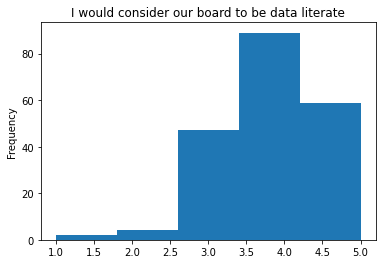

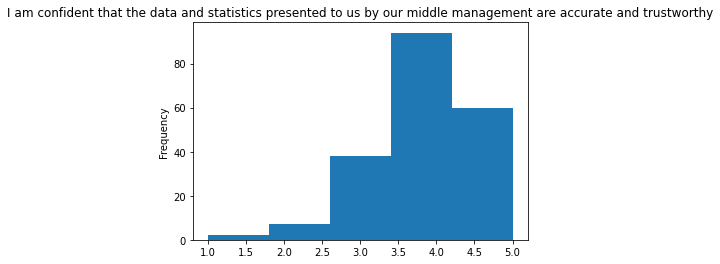

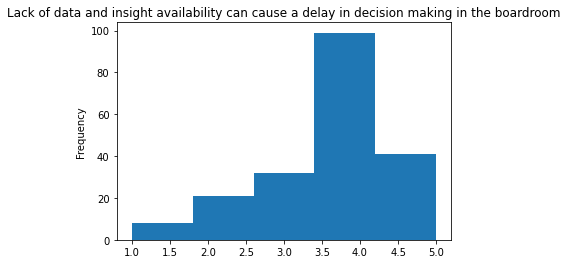

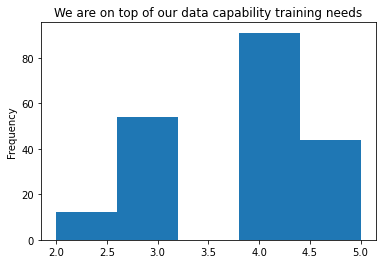

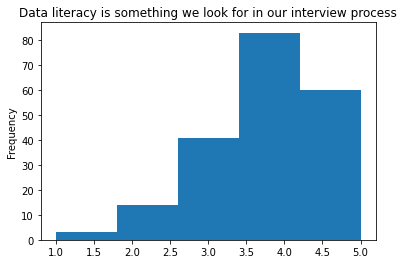

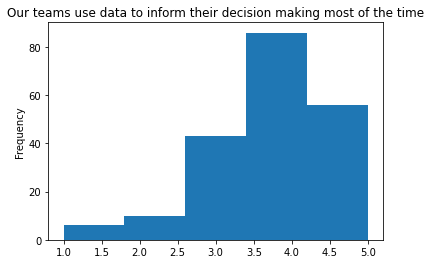

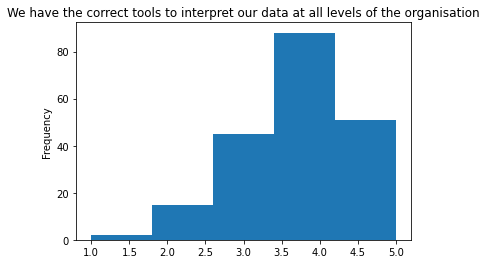

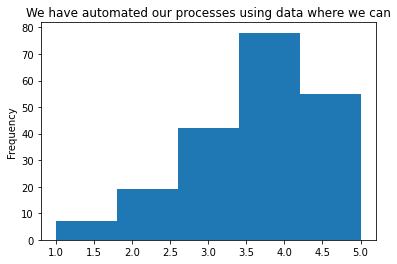

In [6]:
x =  flatresponse_df[['Q4br1','Q4br2', 'Q4br3', 'Q4br4', 'Q4br5', 'Q4br6', 'Q4br7', 'Q4br8']]
#x = x.dropna()
x.describe()

hist_Q4br1 = x.Q4br1.plot.hist(bins=5, alpha=1, title = 'I would consider our board to be data literate')
plt.show()

hist_Q4br2 = x.Q4br2.plot.hist(bins=5, alpha=1, title = 'I am confident that the data and statistics presented to us by our middle management are accurate and trustworthy')
plt.show()

hist_Q4br3 = x.Q4br3.plot.hist(bins=5, alpha=1, title = 'Lack of data and insight availability can cause a delay in decision making in the boardroom')
plt.show()

hist_Q4br4 = x.Q4br4.plot.hist(bins=5, alpha=1, title = 'We are on top of our data capability training needs')
plt.show()

hist_Q4br5 = x.Q4br5.plot.hist(bins=5, alpha=1, title = 'Data literacy is something we look for in our interview process')
plt.show()

hist_Q4br6 = x.Q4br6.plot.hist(bins=5, alpha=1, title = 'Our teams use data to inform their decision making most of the time')
plt.show()

hist_Q4br7 = x.Q4br7.plot.hist(bins=5, alpha=1, title = 'We have the correct tools to interpret our data at all levels of the organisation')
plt.show()

hist_Q4br8 = x.Q4br8.plot.hist(bins=5, alpha=1, title = 'We have automated our processes using data where we can')
plt.show()


#Can I make a radar chart for each set of answers? Iterate over the df?
#fig = px.line_polar(x, r=x.iloc[2], theta=['Q4br1','Q4br2'], line_close=True)

#for index, row in x.iterrows():
    
# use this! https://plotly.com/python/radar-chart/
#fig = px.line_polar(flatresponse_df, r=df[['Q4br1','Q4br2']], theta='theta', line_close=True)

What we see above is that the dta shows a similar shape, with a similar mean and SD between each question. The data skews to the right, showing people on average think they are doing ok to well with the data they have access to. 

Now I will look at the correlation between the questions: whilst I suspect at the moment that there is positive correlation between the questions, hard numbers will help this... 

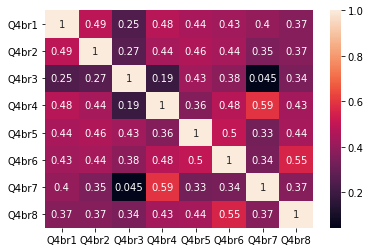

In [7]:
sns.heatmap(x.corr(), annot = True);

So medium strength positive correlation between almost all metrics. This shows that, generally, if someone feels they are doing well in one area, they feel they are doing well in others. Interestingly, the one with almost no correlation is Q4br3 ('Lack of data and insight availability can cause a delay in decision making in the boardroom') and Q4br7 ('We have the correct tools to interpret our data at all levels of the organisation'), showing that it seems having the correct tools to intepret data does __NOT__ predict people's trust in data helping inform timely decisions at the board level.

Anyway, given the above positive relationship between data handling in the organisation, and the similarity of the shape of the data, I now intend to create an aggregate of the above scores, and use this to compare against other metrics. Perhaps a high score predicts a high turnover? We shall investigate... 

In [8]:
#Useful for removing Nans based on a single column! 
#sum_df = flatresponse_df[flatresponse_df['Q4br1'].notna()]

sum_df = flatresponse_df

#flatresponse_df['sum'] = flatresponse_df['Q4br1'] + flatresponse_df['Q4br2']
#+ sum_df['Q4br3'] + sum_df['Q4br4'] + sum_df['Q4br5'] + sum_df['Q4br6'] + sum_df['Q4br7'] + sum_df['Q4br8']

sum_df.describe()


,record,S1,S2,HIDAge,HIDAge2,S3,S4,HIDSEG,QS3,QS4,...,Q10br4,Q10br5,Q10br6,Q10br7,Q10br8,Q10br9,noanswerQ14b_r1,Q20a,OpsResponseScore,TrustResponseScore
count,403.000000,403.000000,403.000000,403.000000,403.000000,0.0,0.0,0.0,403.000000,403.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,60.000000,201.000000,403.000000,403.000000
mean,503.617866,1.225806,46.585608,4.692308,3.699752,NaN,NaN,NaN,7.694789,2.940447,...,3.875622,4.034826,3.880597,3.915423,3.870647,3.865672,0.266667,1.636816,15.947891,15.875931
std,618.488253,0.418632,10.688697,1.074172,1.058806,NaN,NaN,NaN,3.487525,1.657615,...,0.921658,0.890944,0.914151,0.926181,0.879309,0.920253,0.445948,0.482118,2.839796,2.977443
min,6.000000,1.000000,21.000000,2.000000,2.000000,NaN,NaN,NaN,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,6.000000
25%,85.500000,1.000000,38.000000,4.000000,3.000000,NaN,NaN,NaN,5.000000,2.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,14.000000,14.000000
50%,247.000000,1.000000,48.000000,5.000000,4.000000,NaN,NaN,NaN,7.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,2.000000,16.000000,16.000000
75%,634.500000,1.000000,55.000000,6.000000,5.000000,NaN,NaN,NaN,10.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,1.000000,2.000000,18.000000,18.000000
max,2385.000000,2.000000,66.000000,7.000000,6.000000,NaN,NaN,NaN,14.000000,6.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,2.000000,20.000000,20.000000


In [9]:
sum_df['sum'] = sum_df['Q4br1'] + sum_df['Q4br2']+ sum_df['Q4br3'] + sum_df['Q4br4'] + sum_df['Q4br5'] + sum_df['Q4br6'] + sum_df['Q4br7'] + sum_df['Q4br8']
sum_df = sum_df[sum_df['sum'].notna()]
sum_df.describe()

,record,S1,S2,HIDAge,HIDAge2,S3,S4,HIDSEG,QS3,QS4,...,Q10br5,Q10br6,Q10br7,Q10br8,Q10br9,noanswerQ14b_r1,Q20a,OpsResponseScore,TrustResponseScore,sum
count,201.000000,201.000000,201.000000,201.000000,201.000000,0.0,0.0,0.0,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,60.000000,201.000000,201.000000,201.000000,201.000000
mean,745.378109,1.278607,46.402985,4.676617,3.686567,NaN,NaN,NaN,7.686567,2.905473,...,4.034826,3.880597,3.915423,3.870647,3.865672,0.266667,1.636816,16.248756,16.208955,30.955224
std,756.025943,0.449433,11.020063,1.113508,1.093741,NaN,NaN,NaN,3.564585,1.695883,...,0.890944,0.914151,0.926181,0.879309,0.920253,0.445948,0.482118,2.503560,2.589618,5.090480
min,6.000000,1.000000,21.000000,2.000000,2.000000,NaN,NaN,NaN,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,8.000000,7.000000,15.000000
25%,158.000000,1.000000,38.000000,4.000000,3.000000,NaN,NaN,NaN,5.000000,2.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,15.000000,15.000000,28.000000
50%,388.000000,1.000000,48.000000,5.000000,4.000000,NaN,NaN,NaN,7.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,2.000000,16.000000,16.000000,31.000000
75%,1188.000000,2.000000,56.000000,6.000000,5.000000,NaN,NaN,NaN,10.000000,4.000000,...,5.000000,4.000000,5.000000,4.000000,4.000000,1.000000,2.000000,18.000000,18.000000,34.000000
max,2385.000000,2.000000,66.000000,7.000000,6.000000,NaN,NaN,NaN,14.000000,6.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,2.000000,20.000000,20.000000,40.000000


With a sum column, I will now run a correlation analysis against other columns. I will look at markers of a successful business, so I will look to compare to the following columns to see if there is any correlation: 

- [AF_Turnover] Turnover
- [Q10] How much do you spend on data security
- [Q7b] Worried about data loss? 
- [Q8s] is the industry regulated
- [QS9] Annual turnover
- [Q1] As business we make the most out of data
- [Q11] does data inform the business decisions
- [Q14] Data maturity in buying a business

In [10]:
sum_list = sum_df['sum'].tolist()
Q10_list = sum_df['Q10'].tolist()
QS9_list = sum_df['QS9'].tolist()
Q11_list = sum_df['Q11'].tolist()
Q1_list = sum_df['Q1'].tolist()
Q14_list = sum_df['Q14'].tolist()



correlation_sum_Q10 = stats.pearsonr(sum_list, Q10_list)
print ("The correlation between how much people spend on their data security and positive attitudes to data is " + str(round(correlation_sum_Q10[0], 3)) + ", indicating weak, positive correlation.")

correlation_sum_QS9 = stats.pearsonr(sum_list, QS9_list)
print ("The correlation between business turnover and positive attitudes to data is " + str(round(correlation_sum_QS9[0], 3)) + ", indicating weak, positive correlation.")

correlation_sum_Q11 = stats.pearsonr(sum_list, Q11_list)
print ("The correlation between data being discussed in board meetings and positive attitudes to data is " + str(round(correlation_sum_Q11[0], 3)) + ". It should be noted that for Q11, a lower number means data is discussed more at the board level, so we can infer from this that the more data literate a company, the more it is discussed at the board level.")

correlation_sum_Q1 = stats.pearsonr(sum_list, Q1_list)
print ("The correlation between businesses reporting they make the most out of their data and positive attitudes to data is " + str(round(correlation_sum_Q1[0], 3)) + ", indicating strong, positive correlation.")

correlation_sum_Q14 = stats.pearsonr(sum_list, Q14_list)
print ("The correlation between businesses reporting they make the most out of their data and positive attitudes to data is " + str(round(correlation_sum_Q14[0], 3)) + ". A low number indicates that it is a high priority in this case, so negative correlation means it is a major concern for business with increased data maturity.")







The correlation between how much people spend on their data security and positive attitudes to data is 0.251, indicating weak, positive correlation.
The correlation between business turnover and positive attitudes to data is 0.155, indicating weak, positive correlation.
The correlation between data being discussed in board meetings and positive attitudes to data is -0.453. It should be noted that for Q11, a lower number means data is discussed more at the board level, so we can infer from this that the more data literate a company, the more it is discussed at the board level.
The correlation between businesses reporting they make the most out of their data and positive attitudes to data is 0.617, indicating strong, positive correlation.
The correlation between businesses reporting they make the most out of their data and positive attitudes to data is -0.306. A low number indicates that it is a high priority in this case, so negative correlation means it is a major concern for business 

Ok, I think it's worth remembering, we were specifically looking at automation correlating with decision making. So that would be comparing question [Q4br8] with: 

- [Q1] As business we make the most out of data
- [Q7b] Worried about data loss? 
- [Q10] How much do you spend on data security
- [Q11] does data inform the business decisions
- [Q14] Data maturity in buying a business

Let's get going! 

In [11]:
Q4br8_list = sum_df['Q4br8'].tolist()
Q1_list = sum_df['Q1'].tolist()
Q7b_list = sum_df['Q7b'].tolist()
QS9_list = sum_df['QS9'].tolist()
Q10_list = sum_df['Q10'].tolist()
Q11_list = sum_df['Q11'].tolist()
Q14_list = sum_df['Q14'].tolist()

correlation_sum_Q1 = stats.pearsonr(Q4br8_list, Q1_list)
print(correlation_sum_Q1)
#Customers who automate their data processes feel they make the most out of their data

correlation_sum_Q7b = stats.pearsonr(Q4br8_list, Q7b_list)
print(correlation_sum_Q7b)
#Customers who automate their data processes are less likely to feel concerned about a data breach/the financial implications of such

correlation_sum_QS9 = stats.pearsonr(Q4br8_list, QS9_list)
print(correlation_sum_QS9)
#Customers who automate their data processes are slightly more likely to have higher turnover

correlation_sum_Q10 = stats.pearsonr(Q4br8_list, Q10_list)
print(correlation_sum_Q10)
# Customers who automate their data processes are slightly less likely to spend large amounts of money on data structure/security.

correlation_sum_Q11 = stats.pearsonr(Q4br8_list, Q11_list)
print(correlation_sum_Q11)
# Customers who automate their data processes are more likely to discuss the data at the board level

correlation_sum_Q14 = stats.pearsonr(Q4br8_list, Q14_list)
print (correlation_sum_Q14)
# Customers who automate their data processes are slightly more likely to take into consideration a potential acquisition's data maturity. 

(0.520078354825598, 2.525610663843091e-15)
(0.26243962625913186, 0.00016741488890350303)
(0.17106631247550663, 0.0151788777350423)
(0.18860866153432126, 0.0073310171425519785)
(-0.3371816322168546, 9.847688031873426e-07)
(-0.22640392885696797, 0.001229784426303182)


## Key takeaways
- A customer is more likely to have a positive attitude to data if they are utilising it effectively. In esscence, the more you know your data, the better you'll feel about it
- Customers who automate their data process feel they get the most out of their data, are less concerned about the potential for a data breach, are more likely to discuss data at the board level (indicating more decisions are taken based on this data) 
- Customers who automate their data processes are slightly more likely to have higher turnover. This could be indicative of either: 
    - Customers with higher turnover invest more in their data strategy
    - Customers who invest more in their data straegy have a higher turnover (the low p value would _suggest_ the latter in this case). Correlation however does NOT equal causation. 
   
### Next steps: 

-Explore the correlation demonstrated here: they imply causation, but we need to split into two groups to _prove_ this. 


# Question 2
#### - Does anything differentiate mature (Q3) organisations from not mature? 
G: Split into 3 different groups 1 immature, 4 mature. Find if it is a normal distribution. Then do comparitive stats on each (can just do a describe honestly). Could sum and then if mature: high score, if immature low score? Then work on 'are there any recommendations?'. For eg, 'we suggest putting more emphasis on using the data in the board room/decision making!' 

First task below is to look at a group by to get the relevant groups


In [12]:
super_immature_df = flatresponse_df[flatresponse_df.Q3 == 1]
super_immature_df = super_immature_df.reset_index()
print (super_immature_df.shape[0])

kinda_immature_df = flatresponse_df[flatresponse_df.Q3 == 2]
kinda_immature_df = kinda_immature_df.reset_index()
print (kinda_immature_df.shape[0])

kinda_mature_df = flatresponse_df[flatresponse_df.Q3 == 3]
kinda_mature_df = kinda_mature_df.reset_index()
print (kinda_mature_df.shape[0])

mature_df = flatresponse_df[flatresponse_df.Q3 == 4]
mature_df = mature_df.reset_index()
print (mature_df.shape[0])

93
196
99
15


Now we can do a simple comparison between the groups, and see if there is any significance between the groups! Let's look at mean turnover first then compare the groups: 

In [13]:
mean_turnover_1 = round(super_immature_df.QS9.mean(), 2)
print (mean_turnover_1)

mean_turnover_2 = round(kinda_immature_df.QS9.mean(), 2)
print (mean_turnover_2)

mean_turnover_3 = round(kinda_mature_df.QS9.mean(), 2)
print (mean_turnover_3)

mean_turnover_4 = round(mature_df.QS9.mean(), 2)
print (mean_turnover_4)

median_turnover_1 = round(super_immature_df.QS9.median(), 2)
print (median_turnover_1)

median_turnover_2 = round(kinda_immature_df.QS9.median(), 2)
print (median_turnover_2)

median_turnover_3 = round(kinda_mature_df.QS9.median(), 2)
print (median_turnover_3)

median_turnover_4 = round(mature_df.QS9.median(), 2)
print (median_turnover_4)

std_turnover_1 = round(super_immature_df.QS9.std(), 2)
print (std_turnover_1)

std_turnover_2 = round(kinda_immature_df.QS9.std(), 2)
print (std_turnover_2)

std_turnover_3 = round(kinda_mature_df.QS9.std(), 2)
print (std_turnover_3)

std_turnover_4 = round(mature_df.QS9.std(), 2)
print (std_turnover_4)

super_immature_list = super_immature_df.QS9.tolist()
mature_list = mature_df.QS9.tolist()
kinda_immature_list = kinda_immature_df.QS9.tolist()


r = stats.ttest_ind(super_immature_list, kinda_immature_list, equal_var = True)
p = stats.ttest_ind(super_immature_list, mature_list, equal_var = True)
print (r)
print (p)

4.41
4.77
5.37
5.4
4.0
4.0
6.0
6.0
2.3
2.2
2.43
2.26
Ttest_indResult(statistic=-1.2885574953003538, pvalue=0.19858973215704043)
Ttest_indResult(statistic=-1.5528538366462572, pvalue=0.12343875027287111)


So what we can see from the above, is that as as turnover gets higher, the maturity of the relationship with data increases. However, looking at the t test to see if the means are significant, we get a p value of 0.12 at the lowest, indicating that this COULD be a result of random chance between the groups: there is a 12% chance that there is no relationship between data maturity and turnover. Although I want to test this with the rest of the guild. 

Now we will look at other groups for the answer to the question in terms of maturity compared to behviours around data. As these ones get quite long, I want to look at the following metrics: 

- [Q7b] How worried is the business about the financial implications of a data breach. The hypothesis being if you are more data mature, you worry less about the impact of a security incident. 

- [Q4] Do you consider your data more of an asset or a liability? 


In [14]:
super_immature_df = flatresponse_df[flatresponse_df.Q3 == 1]
super_immature_df = super_immature_df.reset_index()
print (super_immature_df.shape[0])

kinda_immature_df = flatresponse_df[flatresponse_df.Q3 == 2]
kinda_immature_df = kinda_immature_df.reset_index()
print (kinda_immature_df.shape[0])

kinda_mature_df = flatresponse_df[flatresponse_df.Q3 == 3]
kinda_mature_df = kinda_mature_df.reset_index()
print (kinda_mature_df.shape[0])

mature_df = flatresponse_df[flatresponse_df.Q3 == 4]
mature_df = mature_df.reset_index()
print (mature_df.shape[0])

93
196
99
15


In [15]:
mean_turnover_1 = round(super_immature_df.Q4.mean(), 2)
print (mean_turnover_1)

mean_turnover_2 = round(kinda_immature_df.Q4.mean(), 2)
print (mean_turnover_2)

mean_turnover_3 = round(kinda_mature_df.Q4.mean(), 2)
print (mean_turnover_3)

mean_turnover_4 = round(mature_df.Q4.mean(), 2)
print (mean_turnover_4)

median_turnover_1 = round(super_immature_df.Q4.median(), 2)
print (median_turnover_1)

median_turnover_2 = round(kinda_immature_df.Q4.median(), 2)
print (median_turnover_2)

median_turnover_3 = round(kinda_mature_df.Q4.median(), 2)
print (median_turnover_3)

median_turnover_4 = round(mature_df.Q4.median(), 2)
print (median_turnover_4)

std_turnover_1 = round(super_immature_df.Q4.std(), 2)
print (std_turnover_1)

std_turnover_2 = round(kinda_immature_df.Q4.std(), 2)
print (std_turnover_2)

std_turnover_3 = round(kinda_mature_df.Q4.std(), 2)
print (std_turnover_3)

std_turnover_4 = round(mature_df.Q4.std(), 2)
print (std_turnover_4)

super_immature_list = super_immature_df.Q4.tolist()
mature_list = mature_df.Q4.tolist()
kinda_immature_list = kinda_immature_df.Q4.tolist()


r = stats.ttest_ind(super_immature_list, kinda_immature_list, equal_var = True)
p = stats.ttest_ind(super_immature_list, mature_list, equal_var = True)
print (r)
print (p)

4.98
5.13
5.76
5.93
5.0
5.0
6.0
6.0
1.14
0.92
0.82
0.8
Ttest_indResult(statistic=-1.1863291323210496, pvalue=0.23647348883138583)
Ttest_indResult(statistic=-3.1120604233776215, pvalue=0.0023880922687142003)


Interestingly, we seem to have significant difference between those with an immature data environment, and those with a mature relationship. This gives me a conclusion that can be presented: 

- If you build up your data analysis teams, you can turn your data from a liability into an asset!

Might seem quite obvious really, but a useful headline. Certainly I think this can be a useful presentation point. 

Next let's look at if they trust the data. Don't want to spend too long on these things so will be a very similar comparison to above, with the key question of: 
 __Do you trust what your data is telling you?__

1 indicates no trust, 7 indicates full trust in the data. 

In [16]:
mean_turnover_1 = round(super_immature_df.Q16.mean(), 2)
print (mean_turnover_1)

mean_turnover_2 = round(kinda_immature_df.Q16.mean(), 2)
print (mean_turnover_2)

mean_turnover_3 = round(kinda_mature_df.Q16.mean(), 2)
print (mean_turnover_3)

mean_turnover_4 = round(mature_df.Q16.mean(), 2)
print (mean_turnover_4)

median_turnover_1 = round(super_immature_df.Q16.median(), 2)
print (median_turnover_1)

median_turnover_2 = round(kinda_immature_df.Q16.median(), 2)
print (median_turnover_2)

median_turnover_3 = round(kinda_mature_df.Q16.median(), 2)
print (median_turnover_3)

median_turnover_4 = round(mature_df.Q16.median(), 2)
print (median_turnover_4)

std_turnover_1 = round(super_immature_df.Q16.std(), 2)
print (std_turnover_1)

std_turnover_2 = round(kinda_immature_df.Q16.std(), 2)
print (std_turnover_2)

std_turnover_3 = round(kinda_mature_df.Q16.std(), 2)
print (std_turnover_3)

std_turnover_4 = round(mature_df.Q16.std(), 2)
print (std_turnover_4)

super_immature_list = super_immature_df.Q16.tolist()
mature_list = mature_df.Q16.tolist()
kinda_immature_list = kinda_immature_df.Q16.tolist()


r = stats.ttest_ind(super_immature_list, kinda_immature_list, equal_var = True)
p = stats.ttest_ind(super_immature_list, mature_list, equal_var = True)
print (r)
print (p)

5.38
5.22
5.68
6.13
5.0
5.0
6.0
6.0
1.01
0.92
0.73
0.83
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)


So what is this telling us? Why, I'll tell you. It is telling us that businesses with greater maturity in their data analysis teams have greater confidence in what they are being told. Once you've collected your socks from the other end of the room, this does give us something to add to the list, as we can help develop businesses' data maturity. Therefore, if we were selling this, we could plausably say that businesses that have a developed data analysis function, like the one we pprovide with say the data refinery, trust their data significantly more than those without. 

# Question 3

- What tends to correlate with the Board discussing data more frequently?
G: similar to above? Looks like Q11, 1 is 'always discussed' 5 is 'never discussed'. Glad it is ranked, gives an easy score... Again, normal dist, find p values for each variable? May be worth investigating Q7b, look at how worried about data breaches they are. Should be a high one?

First thing's first, let's do a correlation analysis. Rather than having a whole bunch of correlations I don't care that much about (which make the whole thing look messy) let's try and do the correlation between Q11 and other metrics. 

In [17]:
correlation_Q11 = flatresponse_df[flatresponse_df.columns[1:]].corr()['Q11'][:-1]
print ((correlation_Q11[correlation_Q11 > 0.4]))
print ((correlation_Q11[correlation_Q11 < -0.4]))


Q11    1.000000
Q12    0.495075
Q13    0.460998
Name: Q11, dtype: float64
Q4br3   -0.406313
Name: Q11, dtype: float64


## In Conclusion

What can we draw from this information? 

- Q11 to 12 correlation: The more a business discusses data in their company meetings, the more time and money they have outlayed on data since GDPR came in
- Q11 to Q13 correlation: The more a business discusses data in their company meetings, the more the business sees themselves investing in data in the future. 
- Q11 to Q4br3: The more a business discusses data in their company meetings, the more the business sees a lack of data availability as causing business delays. 

So what can we draw from this? To put it in a single line: 

#### The more a business discusses data at the board level, the more the business values data in business decisions. 

For our purposes, we therefore need to advance the narrative that readily available data improves the speed of business decisions. 

# Question 4: 

- What role does Data Literacy play in the perception of success with data in organisations?

G Would look to be maybe Q1, and the Q4 subquestions especially? Q5 sub questions look to allow for a proxy measure of data literacy maybe? Q8 is a good candidate. Q16, Q10 is about how much money could be spent but that doesn't tell us literacy: an inefficent system will likely cost more... 

Q1:  To what extent do you agree with the following statement?'As a business/organisation we make the most out of the data we hold'

In [18]:
correlation_Q1 = flatresponse_df[flatresponse_df.columns[1:]].corr()['Q1'][:-1]
print ((correlation_Q1[correlation_Q1 > 0.4]))
print ((correlation_Q1[correlation_Q1 < -0.4]))


Q1                    1.000000
Q4                    0.505186
Q5r2                  0.545008
Q5r3                  0.486480
Q5r4                  0.474377
Q5r5                  0.455274
Q5r7                  0.540986
Q5r8                  0.479840
Q8r1                  0.512715
Q8r2                  0.489162
Q8r3                  0.469264
Q15r4                 0.447675
Q15r7                 0.461118
Q4br1                 0.465706
Q4br2                 0.461332
Q4br4                 0.490299
Q4br6                 0.451585
Q4br7                 0.403864
Q4br8                 0.520078
OpsResponseScore      0.564247
TrustResponseScore    0.596741
Name: Q1, dtype: float64
Series([], Name: Q1, dtype: float64)


Well, I suppose this led to some, rather obvious conclusions, and actually some less obvious ones: 
- Q1 and Q4 have strong correlation. This isn't too surprising, as identified in question 1 Q4 and the br's can be used as a proxy for data literacy.
- Q1 and Q5r have strong correlation. Again, not too surprising, if a company is confident in their data, they'll be more satisfied in the specific aspects of their data management. 
- Q1 and Q8rs have strong correlation. Same as above. 
- Q1 and Q15r4 and Q15r7 have strong correlation. This to me is the most interesting, and deserves a little more investigation, as this shows that people in marketing/sales and Customer service are the most confident that they are getting the most out of their data. It would be interesting to see how businesses feel about their data if they work in say IT, or operations, which can both depend heavily on good data management.

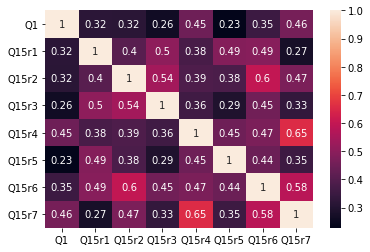

In [19]:
w =  flatresponse_df[['Q1', 'Q15r1','Q15r2', 'Q15r3', 'Q15r4', 'Q15r5', 'Q15r6', 'Q15r7']]
sns.heatmap(w.corr(), annot = True);
            

### Question 4 conclusions

Well, this is intriging. From the above chart we can draw the following conclusions: 

- Marketing/Sales and Customer services are the most confident in their data
- Production/Manufactoring and Finance are the least likely to believe that the business is making the most of their data.

Therefore: 

#### Takeaways: 
- The more a business is confident they are getting the most out of their data, the more data literate a business is. Therefore, we should focus our messaging on the oppurtunity to get the most out of thier data (my heart's skipping a beat at _that_ amazing insight)
- More importantly, as the Production/Manufactoring and Finance departments don't feel as strongly that they are using their data to the fullest, I believe we could target marketing at improving their services, as this appears to be an underserved market. 

# Question 5

How do orgs make the most of their data (Q11, Q1)?

G Q11 is how often is it used, Q1 is how is it perceived compared to other businesses. Maybe compare to annual turnover of the business (QS9) 

In [20]:
print ((correlation_Q1[correlation_Q1 > 0.4]))
print ((correlation_Q1[correlation_Q1 < -0.4]))


print ((correlation_Q11[correlation_Q11 > 0.4]))
print ((correlation_Q11[correlation_Q11 < -0.4]))

Q1                    1.000000
Q4                    0.505186
Q5r2                  0.545008
Q5r3                  0.486480
Q5r4                  0.474377
Q5r5                  0.455274
Q5r7                  0.540986
Q5r8                  0.479840
Q8r1                  0.512715
Q8r2                  0.489162
Q8r3                  0.469264
Q15r4                 0.447675
Q15r7                 0.461118
Q4br1                 0.465706
Q4br2                 0.461332
Q4br4                 0.490299
Q4br6                 0.451585
Q4br7                 0.403864
Q4br8                 0.520078
OpsResponseScore      0.564247
TrustResponseScore    0.596741
Name: Q1, dtype: float64
Series([], Name: Q1, dtype: float64)
Q11    1.000000
Q12    0.495075
Q13    0.460998
Name: Q11, dtype: float64
Q4br3   -0.406313
Name: Q11, dtype: float64


In honesty, the above has been covered elsewhere:

- Q1 correlates with the following: 
    - Q1 and Q4 have strong correlation. This isn't too surprising, as identified in question 1 Q4 and the br's can be used as a proxy for data literacy.
    - Q1 and Q5r have strong correlation. Again, not too surprising, if a company is confident in their data, they'll be more satisfied in the specific aspects of their data management. 
    - Q1 and Q8rs have strong correlation. Same as above. 
    - Q1 and Q15r4 and Q15r7 have strong correlation. This to me is the most interesting, and deserves a little more investigation, as this shows that people in marketing/sales and Customer service are the most confident that they are getting the most out of their data. It would be interesting to see how businesses feel about their data if they work in say IT, or operations, which can both depend heavily on good data management.
    
- Q11 correlates with the following: 

    - Q11 to 12 correlation: The more a business discusses data in their company meetings, the more time and money they have outlayed on data since GDPR came in
    - Q11 to Q13 correlation: The more a business discusses data in their company meetings, the more the business sees themselves investing in data in the future. 
    - Q11 to Q4br3: The more a business discusses data in their company meetings, the more the business sees a lack of data availability as causing business delays. So they remedy that! 

# Question 6

- How do Operations (Q5r1,2,3,6) and Trust (Q5r4,5,7,8) influence Board actions?

G Does it have high scores across the board on these questions that correlates to board actions (Q1, Q11, Q16 maybe?)? So if they score high here, is the board influenced by these? Correlation analysis, could aggregate and one as 'data literacy' and one as 'data maturity'? 

AxesSubplot(0.125,0.125;0.62x0.755)


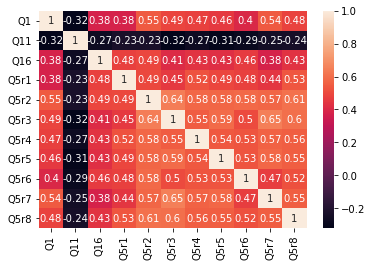

In [21]:
w =  flatresponse_df[['Q1', 'Q11', 'Q16', 'Q5r1', 'Q5r2', 'Q5r3', 'Q5r4', 'Q5r5', 'Q5r6', 'Q5r7', 'Q5r8']]
print ((sns.heatmap(w.corr(), annot = True)));
# Alternatively, let's aggregate some of these to answer the questions: Q5 1,2,3,6 to be trust, 4, 5, 7 ,8 to be Trust. 



C:\Users\Shedder\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shedder\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Shedder\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

AxesSubplot(0.125,0.125;0.62x0.755)


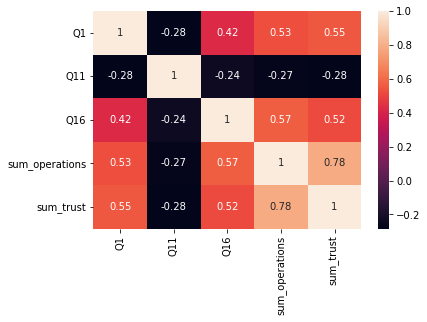

In [22]:
sum_df['sum_operations'] = sum_df['Q5r1'] + sum_df['Q5r2']+ sum_df['Q5r3'] + sum_df['Q5r6']
sum_df['sum_operations'] = sum_df['sum_operations'].dropna()

sum_df['sum_trust'] = sum_df['Q5r4'] + sum_df['Q5r5'] + sum_df['Q5r7'] + sum_df['Q5r8']
sum_df['sum_trust'] = sum_df['sum_trust'].dropna()


y =  sum_df[['Q1', 'Q11', 'Q16', 'sum_operations', 'sum_trust']]
print ((sns.heatmap(y.corr(), annot = True)));

### Question 6 conclusions: 

- Q1 correlates strongly with both Trust in data, and the use of data in Operations. Interestingly, it was the way the data is structured (Q5r2) and the quality of reporting (Q5r7) that gave businesses the confidence that they were using their data to the fullest potential. Showing that it's important that people see the data, but also feel it is managed securely. 

- Q11 generally correlated negatively with the Q5 responses. This makes sense, as if people are putting more faith in their systems, they're more likely to discuss it at the board level. It is however worth noting that no correlation went below -0.32, showing medium level correlation.

- Q16 (do you trust what your data is showing you) seemed to correlate fairly strongly with both trust and operations questions. This is to be expected with trust, however operations seems to correlate even better! However, it is worth saying that Q11 and Q16 didn't show strong correlation, but did show some (-0.24), so this seems to have little impact on if people discuss it at the board level.

# Question 7

- What other factors seem to influence investment decisions (Q10 & sub-questions)?

G: Is this not Q14 as an investment in purchasing another company? Guess it goes back to how much they value data as a whole... 

Seem to have answered this below in trying to assess what people's motivation is so we can sell it 😮 So will post that below: 


           Q10br1      Q10br2      Q10br3      Q10br4      Q10br5      Q10br6  \
count  201.000000  201.000000  201.000000  201.000000  201.000000  201.000000   
mean     3.945274    3.930348    3.522388    3.875622    4.034826    3.880597   
std      1.059240    0.827722    1.140503    0.921658    0.890944    0.914151   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000    4.000000    3.000000    3.000000    4.000000    3.000000   
50%      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   
75%      5.000000    4.000000    4.000000    5.000000    5.000000    4.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

           Q10br7      Q10br8      Q10br9  
count  201.000000  201.000000  201.000000  
mean     3.915423    3.870647    3.865672  
std      0.926181    0.879309    0.920253  
min      1.000000    1.000000    1.000000  
25%      3.000000    3.000000    3.000000  
50%   

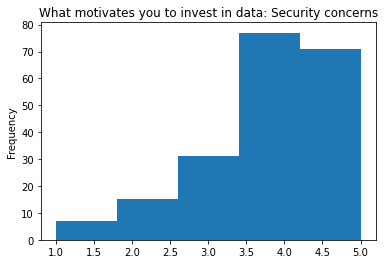

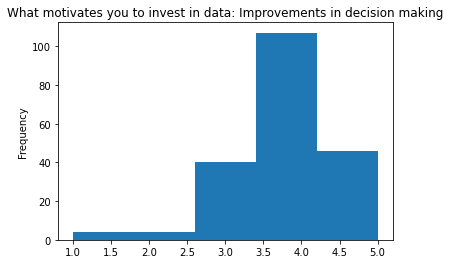

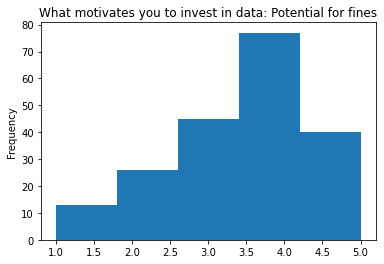

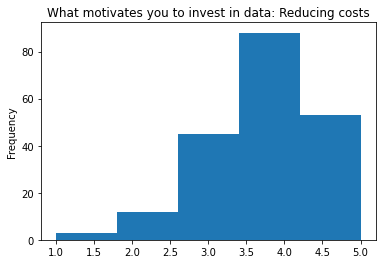

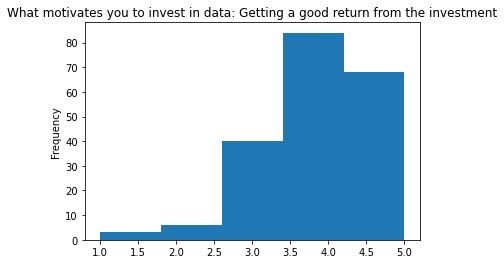

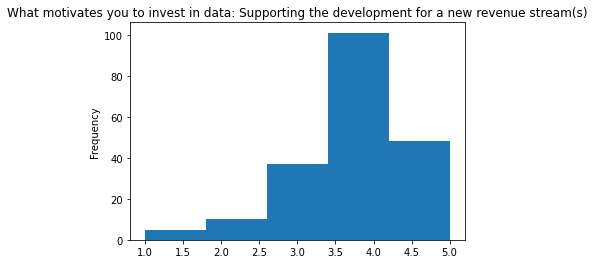

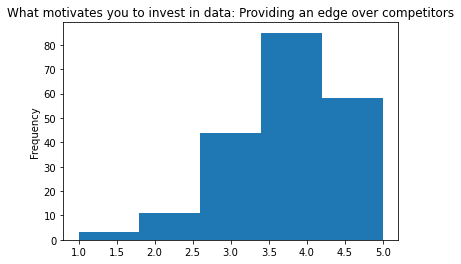

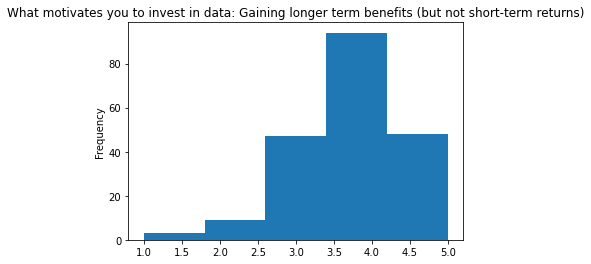

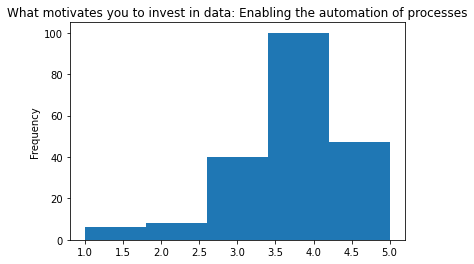

In [23]:
x =  flatresponse_df[['Q10br1','Q10br2', 'Q10br3', 'Q10br4', 'Q10br5', 'Q10br6', 'Q10br7', 'Q10br8', 'Q10br9']]
#x = x.dropna()
print (x.describe())

hist_Q10br1 = x.Q10br1.plot.hist(bins=5, alpha=1, title = 'What motivates you to invest in data: Security concerns')
plt.show()

hist_Q10br2 = x.Q10br2.plot.hist(bins=5, alpha=1, title = 'What motivates you to invest in data: Improvements in decision making')
plt.show()

hist_Q10br3 = x.Q10br3.plot.hist(bins=5, alpha=1, title = 'What motivates you to invest in data: Potential for fines')
plt.show()

hist_Q10br4 = x.Q10br4.plot.hist(bins=5, alpha=1, title = 'What motivates you to invest in data: Reducing costs')
plt.show()

hist_Q10br5 = x.Q10br5.plot.hist(bins=5, alpha=1, title = 'What motivates you to invest in data: Getting a good return from the investment')
plt.show()

hist_Q10br6 = x.Q10br6.plot.hist(bins=5, alpha=1, title = 'What motivates you to invest in data: Supporting the development for a new revenue stream(s)')
plt.show()

hist_Q10br7 = x.Q10br7.plot.hist(bins=5, alpha=1, title = 'What motivates you to invest in data: Providing an edge over competitors')
plt.show()

hist_Q10br8 = x.Q10br8.plot.hist(bins=5, alpha=1, title = 'What motivates you to invest in data: Gaining longer term benefits (but not short-term returns)')
plt.show()

hist_Q10br9 = x.Q10br9.plot.hist(bins=5, alpha=1, title = 'What motivates you to invest in data: Enabling the automation of processes')
plt.show()

And also, how does Q10 correlate with the others? Let's find out! 

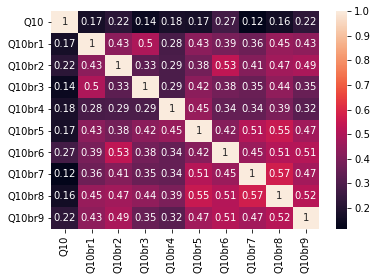

In [24]:
w =  flatresponse_df[['Q10', 'Q10br1','Q10br2', 'Q10br3', 'Q10br4', 'Q10br5', 'Q10br6', 'Q10br7', 'Q10br8', 'Q10br9']]
sns.heatmap(w.corr(), annot = True);

Well, there's no such thing as failure unless you don't learn from it. In this case, it looks like there's no strong correlation between money spent on data handling and any particular reason for investing. So whilst there is some correlation, it doesn't look like companies that spend more on data have a particular area of the data services they have, rather it's almost seen as a bit of a money bin? 

### Conclusions

- It seems like the potential for fines is the least common reason for investing in data handling, and the strongest reasons for investing is good return on investment, and security concerns. Showing that businesses that invest in data do it with a long term view in mind, so we should be emphasising the long term growth oppurtunities. Further, we could look at a potential security consultancy role? 

- There's no strong correlation between spend on data annually, and any particular reason for that spend: rather it is a general 'I want to invest in data'.  

# Question 8 

- Did Covid change any patterns in responses?

G: Seems a simple compare and contrast before and after? Two groups, so could do some p tests, or at least seperate into a 2020 and 2021/22 group. That does leave one small group of 100 and one large group of 300, maybe split even further to compare 21 vs 22. That way we can see if the approach was consistent throughout the pandemic, maybe there was a drop off in the use of data then it picked up again in the following year? All speculation until the analysis is done! 

In [25]:
wave_1_df = flatresponse_df[flatresponse_df.Wave == 'wave1']
wave_1_df = wave_1_df.reset_index()
print (wave_1_df.shape[0])

wave_2_df = flatresponse_df[flatresponse_df.Wave == 'wave2']
wave_2_df = wave_2_df.reset_index()
print (wave_2_df.shape[0])

wave_3_df = flatresponse_df[flatresponse_df.Wave == 'wave3']
wave_3_df = wave_3_df.reset_index()
print (wave_3_df.shape[0])

102
100
201


OK, now we have the dataframes we want to work with. Nice and simple analysis to be done now! We'll compare means between the groups, and see if any are significantly different. 

The question is, what variables do we care about? 

Q1: As a business, do you get the most out of the data you use? 

Q10: how much do you spend on Data? 

Q13: looking to the future, do you expect to invest more in Data governance (will be useful to see how it impacted long term planning!)


In [26]:
mean_data_use_1 = round(wave_1_df.Q1.mean(),2)
print (mean_data_use_1)

mean_data_use_2 = round(wave_2_df.Q1.mean(),2)
print (mean_data_use_2)

mean_data_use_3 = round(wave_3_df.Q1.mean(),2)
print (mean_data_use_3)

std_data_use_1 = round(wave_1_df.Q1.std(),2)
print (std_data_use_1)

std_data_use_2 = round(wave_2_df.Q1.std(),2)
print (std_data_use_2)

std_data_use_3 = round(wave_3_df.Q1.std(),2)
print (std_data_use_3)

wave_1_list = wave_1_df.Q1.tolist()
wave_2_list = wave_2_df.Q1.tolist()
wave_3_list = wave_3_df.Q1.tolist()

r = stats.ttest_ind(wave_1_list, wave_2_list, equal_var = True)
p = stats.ttest_ind(wave_1_list, wave_3_list, equal_var = True)
print (r)
print (p)

3.71
3.71
3.91
1.27
1.25
0.99
Ttest_indResult(statistic=-0.02321317163169683, pvalue=0.9815033754513216)
Ttest_indResult(statistic=-1.5438852908224665, pvalue=0.12366679338203251)


Hmm, nothing significant it seems. Although between 2020 and 2022 there was an increase of mean data usage, so it does seems companies are moving towards better use of data. There could be 101 reasons for this though, such as a general attitude to better data governance. Can't say for certain what the reason is without more data. 

Next up, Q10

In [27]:
mean_data_use_1 = round(wave_1_df.Q10.mean(), 2)
print (mean_data_use_1)

mean_data_use_2 = round(wave_2_df.Q10.mean(), 2)
print (mean_data_use_2)

mean_data_use_3 = round(wave_3_df.Q10.mean(), 2)
print (mean_data_use_3)

std_data_use_1 = round(wave_1_df.Q10.std(), 2)
print (std_data_use_1)

std_data_use_2 = round(wave_2_df.Q10.std(), 2)
print (std_data_use_2)

std_data_use_3 = round(wave_3_df.Q10.std(), 2)
print (std_data_use_3)

wave_1_list = wave_1_df.Q10.tolist()
wave_2_list = wave_2_df.Q10.tolist()
wave_3_list = wave_3_df.Q10.tolist()

r = stats.ttest_ind(wave_1_list, wave_2_list, equal_var = True)
p = stats.ttest_ind(wave_1_list, wave_3_list, equal_var = True)
print (r)
print (p)

4.24
4.14
3.81
2.28
2.44
2.45
Ttest_indResult(statistic=0.28712855146846633, pvalue=0.7743111526277273)
Ttest_indResult(statistic=1.4563453331069163, pvalue=0.14633947035651884)


That is quite shocking, that the money spent has gone DOWN as the years have gone by. I suppose the question from that is, is the average turnover of the business going down over this period? GDP (a limited measure to be fair) has only just returned to pre-pandemic levels, so maybe companies had less money to invest in shiny new data structures, and simply maintained where they were or cut back to survive. Will need to be analysed, which I wil do now! 

In [28]:
mean_data_use_1 = round(wave_1_df.QS9.mean(), 2)
print (mean_data_use_1)

mean_data_use_2 = round(wave_2_df.QS9.mean(), 2)
print (mean_data_use_2)

mean_data_use_3 = round(wave_3_df.QS9.mean(), 2)
print (mean_data_use_3)

std_data_use_1 = round(wave_1_df.QS9.std(), 2)
print (std_data_use_1)

std_data_use_2 = round(wave_2_df.QS9.std(), 2)
print (std_data_use_2)

std_data_use_3 = round(wave_3_df.QS9.std(), 2)
print (std_data_use_3)

wave_1_list = wave_1_df.QS9.tolist()
wave_2_list = wave_2_df.QS9.tolist()
wave_3_list = wave_3_df.QS9.tolist()

r = stats.ttest_ind(wave_1_list, wave_2_list, equal_var = True)
p = stats.ttest_ind(wave_1_list, wave_3_list, equal_var = True)
print (r)
print (p)

5.34
5.04
4.52
2.16
2.33
2.31
Ttest_indResult(statistic=0.9591127757343867, pvalue=0.3386599561992598)
Ttest_indResult(statistic=2.9817273346838715, pvalue=0.0031004088561399816)


So yes, it looks like turnover went down over the period, which means less money in the business, so less investment in data. Maybe now the economy is picking up, people would be interested in splurging some cash on better data infrastructure? Never let a good tragedy go to waste I suppose. 

Onto the final one I want to analyse here, Q13. That'll tell us if people want to splurge some cash money! 

Q13: Thinking 2-3 years into the future, which of the following do you expect to apply to your business/organisation?
A lower number means investing more time and money into data

In [29]:
mean_data_use_1 = round(wave_1_df.Q13.mean(), 2)
print (mean_data_use_1)

mean_data_use_2 = round(wave_2_df.Q13.mean(), 2)
print (mean_data_use_2)

mean_data_use_3 = round(wave_3_df.Q13.mean(), 2)
print (mean_data_use_3)

std_data_use_1 = round(wave_1_df.Q13.std(), 2)
print (std_data_use_1)

std_data_use_2 = round(wave_2_df.Q13.std(), 2)
print (std_data_use_2)

std_data_use_3 = round(wave_3_df.Q13.std(), 2)
print (std_data_use_3)

wave_1_list = wave_1_df.Q13.tolist()
wave_2_list = wave_2_df.Q13.tolist()
wave_3_list = wave_3_df.Q13.tolist()

r = stats.ttest_ind(wave_1_list, wave_2_list, equal_var = True)
p = stats.ttest_ind(wave_1_list, wave_3_list, equal_var = True)
print (r)
print (p)

2.02
2.08
2.06
0.74
0.71
0.78
Ttest_indResult(statistic=-0.5913749129034048, pvalue=0.554937047882444)
Ttest_indResult(statistic=-0.48465362588523286, pvalue=0.6282745571082247)


Looks like no real correlation between them tbh. That's a shame, blows my theory out of the water. However, it is worth saying that businesses still seem interested in the possibility of spending more money in the business, as the mean response in each group was 2, 'We expect to be investing somewhat more time and money into managing the data we hold'. So there is a desire to invest in data that hasn't been dinted by COVID. 

Finally we can look at Q19, ' How has the COVID-19 pandemic impacted the importance of data in your board room?'. This question was only asked of businesses in waves 2 or 3, so only two groups to compare. It might also be worth comparing this answer to Q11: ' Which of the following statements is true when it comes to the way the data you hold as a business/organisation is discussed as part of your board meetings?' With a low number indicating greater importance at the board level.  

In [30]:
mean_data_use_2 = round(wave_2_df.Q19.mean(), 2)
print (mean_data_use_2)

mean_data_use_3 = round(wave_3_df.Q19.mean(), 2)
print (mean_data_use_3)

std_data_use_2 = round(wave_2_df.Q19.std(), 2)
print (std_data_use_2)

std_data_use_3 = round(wave_3_df.Q19.std(), 2)
print (std_data_use_3)

wave_2_list = wave_2_df.Q19.tolist()
wave_3_list = wave_3_df.Q19.tolist()

p = stats.ttest_ind(wave_2_list, wave_3_list, equal_var = True)
print (p)

correlation_Q19 = flatresponse_df[flatresponse_df.columns[1:]].corr()['Q19'][:-1]
print ((correlation_Q19[correlation_Q19 > 0.4]))
print ((correlation_Q19[correlation_Q19 < -0.4]))


3.52
3.43
0.86
0.8
Ttest_indResult(statistic=0.8702507076486968, pvalue=0.38486152542285346)
Q19    1.0
Name: Q19, dtype: float64
Q20a   -0.421142
Name: Q19, dtype: float64


Hm, not much change between the two... Although, it is worth noting that on average, people consider it ever so slightly more important (throughout the pandemmic the value has actually gone down). Are people thinking that COVID 19 was an aberration, and once able to survive that we just move onto the next thing? That certainly seems to be the way the government thinks. Likely, people are more concerned with getting back to where they were and general everyday survival, rather than investing in data projects for survival due to a major event?  

### Question 8 conclusion: 

Really, I don't think there's too much of interest here: turnover went down over the period, as has the amount invested in data systems. Likely because businesses just don't have the money to invest really. Having said that, from the data, I would say that: 

- Businesses consider the Covid pandemic as something to survive and then continue as normal, suggesting that in fact covid 19 had no significant impact upon businesses data use. 

- Money invested in data seemed to go down with the reduction in turnover caused by Covid, indicating (to me at least) businesses don't value data systems anymore during extreme events, maybe even a little less. Maybe we need to emphasise that investing in data will allow you to survive major shocks better? Other research seems to show that companies are investing in data more now... https://www.mckinsey.com/business-functions/strategy-and-corporate-finance/our-insights/how-covid-19-has-pushed-companies-over-the-technology-tipping-point-and-transformed-business-forever 

I would in the future like to see more about remote working and the use of data for this: that is a long term change to businesses, if we can demonstrate that remote working requires better data management, perhaps we have an 'in'? 

# Question 9

- What role do people & training play in an organisation's data maturity?

G: Could compare statistics on the people (eg age, role in the org, responsibility for data) with responses. 

Maybe split up based on Q15? Or maybe the correlation between Q15 responses and Q1? This was covered in Question 4 above, showing where in the business people feel data isn't being used the best.  

Could also ask, does the responder have an interest/hand in how data is used? Leaders of the business having more hands on access might suggest better data maturity? If that's the case, maybe we'd look at correlation between QS5 and maybe QS9 (turnover)/Q1 (data maturity) 

In [31]:
hands_on_df = flatresponse_df[flatresponse_df.QS5 == 1]
hands_on_df = hands_on_df.reset_index()
print (hands_on_df.shape[0])

influential_df = flatresponse_df[flatresponse_df.QS5 == 2]
influential_df = influential_df.reset_index()
print (influential_df.shape[0])

interest_df = flatresponse_df[flatresponse_df.QS5 == 3]
interest_df = interest_df.reset_index()
print (interest_df.shape[0])

no_interest_df = flatresponse_df[flatresponse_df.QS5 == 4]
no_interest_df = no_interest_df.reset_index()
print (no_interest_df.shape[0])


249
111
43
0


This shows us that none fit into the 4th group (No interest in the data), so we can discount that!

In [32]:
mean_hands_on = round(hands_on_df.QS9.mean(), 2)
print (mean_hands_on)

mean_influential = round(influential_df.QS9.mean(), 2)
print (mean_influential)

mean_interest = round(interest_df.QS9.mean(), 2)
print (mean_interest)

std_hands_on = round(hands_on_df.QS9.std(), 2)
print (std_hands_on)

std_influential = round(influential_df.QS9.std(), 2)
print (std_influential)

std_interest = round(interest_df.QS9.std(), 2)
print (std_interest)

hands_on_list = hands_on_df.QS9.tolist()
influential_list = influential_df.QS9.tolist()
interest_list = interest_df.QS9.tolist()

r = stats.ttest_ind(hands_on_list, influential_list, equal_var = True)
p = stats.ttest_ind(hands_on_list, interest_list, equal_var = True)
print (r)
print (p)

4.86
4.72
5.23
2.34
2.17
2.43
Ttest_indResult(statistic=0.5159852705304087, pvalue=0.6061832237993041)
Ttest_indResult(statistic=-0.9715051046593131, pvalue=0.33210640758365473)


Unfortunately, this seems to show us that there is not significant differences between any of the groups to reject the null hypothesis: that there is no effect of how hands on with the data leaders are with turnover. 

In [35]:
mean_hands_on = round(hands_on_df.Q1.mean(), 2)
print (mean_hands_on)

mean_influential = round(influential_df.Q1.mean(), 2)
print (mean_influential)

mean_interest = round(interest_df.Q1.mean(), 2)
print (mean_interest)

std_hands_on = round(hands_on_df.Q1.std(), 2)
print (std_hands_on)

std_influential = round(influential_df.Q1.std(), 2)
print (std_influential)

std_interest = round(interest_df.Q1.std(), 2)
print (std_interest)

hands_on_list = hands_on_df.Q1.tolist()
influential_list = influential_df.Q1.tolist()
interest_list = interest_df.Q1.tolist()

r = stats.ttest_ind(hands_on_list, influential_list, equal_var = True)
p = stats.ttest_ind(interest_list, influential_list, equal_var = True)
q = stats.ttest_ind(hands_on_list, interest_list, equal_var = True)
print (r)
print (p)
print (q)

3.87
3.91
3.19
1.11
1.1
1.18
Ttest_indResult(statistic=-0.30403806545294254, pvalue=0.7612755297268847)
Ttest_indResult(statistic=-3.5892512371206657, pvalue=0.0004468206924122061)
Ttest_indResult(statistic=3.7027284687158875, pvalue=0.00025527399583504044)


So, this shows us that there is significant difference between the groups that have influence over the data strategy and businesses that feel that they have a good handle of their data. To me there are two interpretations of this: 

### The cynical me:
- Business leaders feel the data is not used to the fullest if they don't have influence over it, showing a lack of a desire to delegate

### The nice me: 
- Business leaders feel the data is used best when they are able to provide a top down view and make business decisions with a hand in the pie (as it were...) 

Therefore, I take from this quite strong p value: 

## Conclusions

- Business leaders feel the data is used best when they are able to provide a top down view and make business decisions with a hand in the pie (as it were...) 
- Even if leaders are hands on with their data, that does not necessarily mean greater turnover. However, it does lead to greater confidence that their data is being used to the fullest. 

From this (and what we have stated above), could we say that those with a more hands on approach to the data feel they are using their data better, and so feel more secure in their data and that it is an asset to their business rather than a problem. 






# Question 10

- Are there any common grouping/clustering of responses? How would you describe these groupings?

# Question 11 

- Which factors carry the most weight in determining perceived 'success' (Q3, 4 & 5) with data?

G: As above, correlate each row with each of these questions and see how strong the correlation value is. Thankfully all are 1 = bad, high number = good, so able to aggregate them. ALTHOUGH they don't go on the same scale, could be an issue?  

Q3: Do you consider yourself a leader in your industry in data handling? 

Q4: Do you believe data to be more of an asset or a risk? 

In [ ]:
correlation_Q3 = flatresponse_df[flatresponse_df.columns[1:]].corr()['Q3'][:-1]
print ((correlation_Q3[correlation_Q3 > 0.4]))
print ((correlation_Q3[correlation_Q3 < -0.4]))
#print (correlation_Q3)


correlation_Q4 = flatresponse_df[flatresponse_df.columns[1:]].corr()['Q4'][:-1]
print ((correlation_Q4[correlation_Q4 > 0.4]))
print ((correlation_Q4[correlation_Q4 < -0.4]))


#correlation_Q5 = flatresponse_df[flatresponse_df.columns[1:]].corr()['Q5'][:-1]
#print ((correlation_Q5[correlation_Q5 > 0.4]))
#print ((correlation_Q5[correlation_Q5 < -0.4]))


Q3    1.0
Name: Q3, dtype: float64
Series([], Name: Q3, dtype: float64)
Q1                    0.505186
Q4                    1.000000
Q5r2                  0.461073
Q5r3                  0.460764
Q5r4                  0.414921
Q5r5                  0.452428
Q5r7                  0.467550
Q15r4                 0.437810
OpsResponseScore      0.530116
TrustResponseScore    0.519011
Name: Q4, dtype: float64
Series([], Name: Q4, dtype: float64)


Well, that is somewhat interesting: Q3, do you believe yourself a leader in the industry, doesn't seem to correlate with anything more than 0.4/-0.4. However, Q4, 'do you believe data is more of an asset or a risk?', does correlate with Q1, and the Q5 responses: 2 (The way the data is structured/managed), 3 (The systems you use to manage/understand the data), 4 (The people you have to manage/understand the data), 5 (The usefulness of the metrics/KPIs you get from the data), and 7 (The quality of the reporting you get from the data). Based on the information found before, about Q1 correlation, I believe the angle we should be going for is: 

- If customers believe they have a better relationship with their data, they generally do! 

They can then build their data tools up from there. Therefore, at this point I am saying: 

- If a customer feels they make the most out of the data they hold, they are more likely to feel their data is an asset, and therefore less of a risk. 

So to reinforce the argument, I suppose the other question that needs to be answered: what is the benefit of thinking that data is more of an asset than a risk? Papers written on the subject are sketchy, in honesty it looks like big data hasn't been around for scientific papers to draw any significant conclusions as yet. I would like to read the paper https://www.sciencedirect.com/science/article/abs/pii/S0925527314004253 as it is a systematic review on big data's impact. I may well email the authors and see if they'll give me the paper for free! 

# Question 12 

- Are there any responses which appear to be outliers/extreme/unexpected positions?

G: Histograms or box/whiskers plots seem the best approach for this. However, this is looking at a single column at a time and may miss the forest for the trees? Maybe find some way to aggregate (looks like it could be done based upon previous questions? High data quality/use vs low) And then look for lower values in these groups. Maybe (for example) people with low data use are terrified of a data leak, and shovel money at the problem to avoid that but aren't actually analysing data? HOPEFULLY high turnover businesses utilise their data, but maybe they don't 🤷‍♂️